In [1]:
import os
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import cmocean

# Location for saving figures
publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure3'

if not os.path.exists(publication_figures):
    os.makedirs(publication_figures)


In [2]:
# Figure parameters
# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm

# Set the values for the publication figure parameters
plt.close('all')
rc('text', usetex='false') 

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
# rcParams['figure.dpi'] = 300
sns.set(font_scale = 1)
plt.style.use('default')
rcParams.update({'font.size': 12})
%matplotlib notebook

## Plot Filament Orientation Decorrelation 

In [66]:
# data_folder = '../../../processed_data/OrientationDecorrelation'

data_folder = '/home/deepak/Dropbox/LacryModeling/processed_data/OrientationDecorrelation'
n_datasets = len(os.listdir(data_folder))

cmap = plt.cm.get_cmap('viridis', 255)
colors = [cmap(ii) for ii in np.linspace(0,1, n_datasets)]

parameter = 'potDipole strength'

df_orient_decorr = pd.DataFrame({})

for ii, folder in enumerate(os.listdir(data_folder)):

    cwd = os.path.join(data_folder, folder)
#     print(cwd)
    os.chdir(cwd)
    
    data_file = [file for file in os.listdir(cwd) if file.endswith('.csv') and 'metadata' not in file]
    
    print(data_file)
    metadata_file = [file for file in os.listdir(cwd) if file.endswith('.csv') and 'metadata' in file]
    df_metadata = pd.read_csv(metadata_file[0])

    
    parameter_value = df_metadata[parameter][0]
    
    for file in data_file:
        df = pd.read_csv(file)
        df[parameter] = np.repeat(parameter_value, len(df), axis=0)
        
        df['Time (scaled)'] = df['Time']/(df_metadata[' activity time scale'][0]/2) # Rescale time by the duration of compression/extension activity phase
        
        df_orient_decorr = df_orient_decorr.append(df)
        
    
    



['SimResults_07__OrientationDecorrelation.csv', 'SimResults_03__OrientationDecorrelation.csv', 'SimResults_05__OrientationDecorrelation.csv', 'SimResults_00__OrientationDecorrelation.csv', 'SimResults_09__OrientationDecorrelation.csv', 'SimResults_06__OrientationDecorrelation.csv', 'SimResults_04__OrientationDecorrelation.csv', 'SimResults_01__OrientationDecorrelation.csv', 'SimResults_02__OrientationDecorrelation.csv', 'SimResults_08__OrientationDecorrelation.csv']
['SimResults_07__OrientationDecorrelation.csv', 'SimResults_03__OrientationDecorrelation.csv', 'SimResults_05__OrientationDecorrelation.csv', 'SimResults_00__OrientationDecorrelation.csv', 'SimResults_09__OrientationDecorrelation.csv', 'SimResults_06__OrientationDecorrelation.csv', 'SimResults_04__OrientationDecorrelation.csv', 'SimResults_01__OrientationDecorrelation.csv', 'SimResults_02__OrientationDecorrelation.csv', 'SimResults_08__OrientationDecorrelation.csv']
['SimResults_07__OrientationDecorrelation.csv', 'SimResult

In [21]:
df_orient_decorr

,Unnamed: 0,Time,Activity cycle,Phase,Tip decorrelation,Base-Tip decorrelation,potDipole strength,Time (scaled)
0,0,0.000000,0.0,compression,1.000000,1.000000,1.782051,0.000000
1,1,3.838384,0.0,compression,1.000000,1.000000,1.782051,0.005118
2,2,7.676768,0.0,compression,1.000000,1.000000,1.782051,0.010236
3,3,11.515152,0.0,compression,1.000000,1.000000,1.782051,0.015354
4,4,15.353535,0.0,compression,1.000000,1.000000,1.782051,0.020471
...,...,...,...,...,...,...,...,...
9195,95,355.050505,45.0,extension,0.727052,0.989376,2.743590,0.473401
9196,96,358.787879,45.0,extension,0.727490,0.989384,2.743590,0.478384
9197,97,362.525253,45.0,extension,0.727905,0.989390,2.743590,0.483367
9198,98,366.262626,45.0,extension,0.728309,0.989397,2.743590,0.488350


<IPython.core.display.Javascript object>


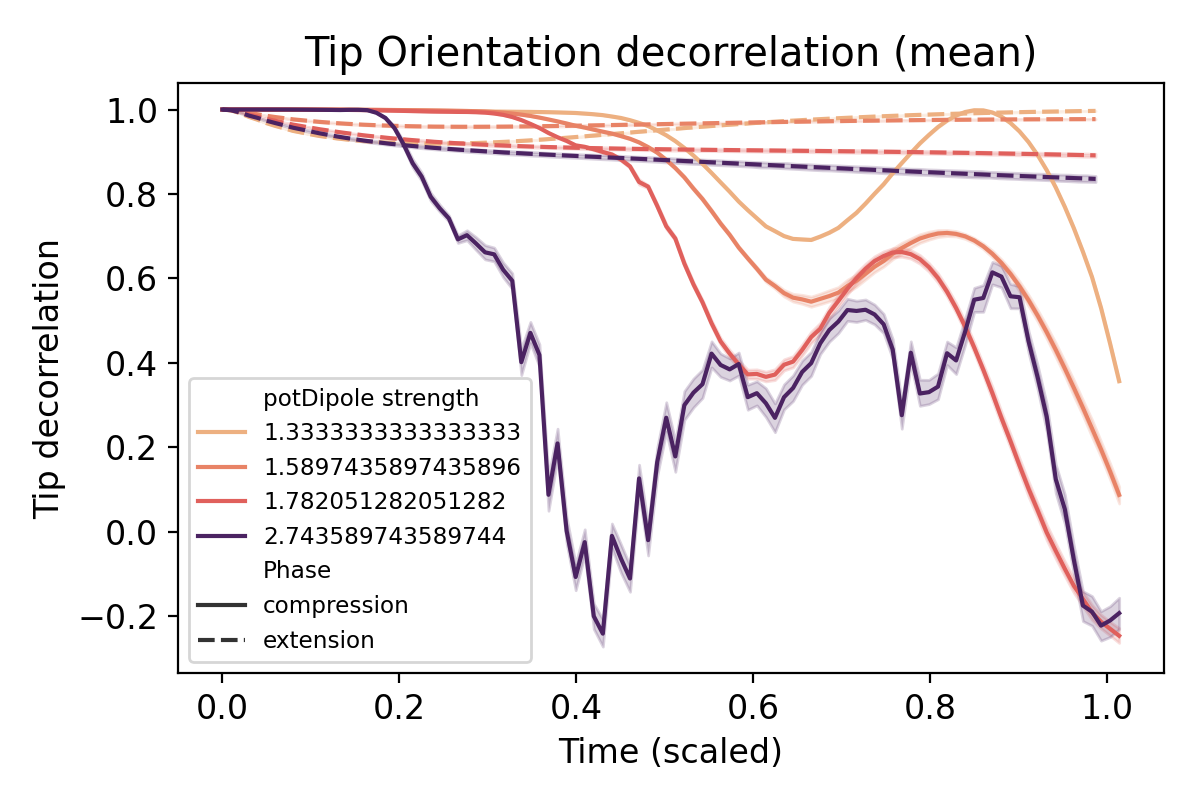

In [76]:
# Plot the data
# plt.style.use('default')

save = True
plt.figure(figsize=(6,4))
title = 'Tip Orientation decorrelation (mean)'

sns.lineplot(x = 'Time (scaled)', y = 'Tip decorrelation', data = df_orient_decorr, 
             hue = parameter, style = 'Phase', ci = 95, palette = 'flare')

plt.title(title)
plt.legend(loc='best', prop={'size':'x-small'})
plt.tight_layout()

if(save):
    
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
    
plt.show()

## Filament Reorientation Distributions

In [45]:
# data_folder = '/home/deepak/Dropbox/LacryModeling/processed_data/OrientationDecorrelation'

data_folder = '/home/deepak/Dropbox/LacryModeling/processed_data/FilamentReorientation'

n_datasets = len(os.listdir(data_folder))

parameter = 'potDipole strength'

values_to_plot = [1.52, 2.74]

df_reorient = pd.DataFrame({})

for ii, folder in enumerate(os.listdir(data_folder)):

    cwd = os.path.join(data_folder, folder)
#     print(cwd)
    os.chdir(cwd)
    
    print('In folder {}...'.format(cwd))
    data_file = [file for file in os.listdir(cwd) if file.endswith('.csv') and 'metadata' not in file]
    
    
    metadata_file = [file for file in os.listdir(cwd) if file.endswith('.csv') and 'metadata' in file]
    df_metadata = pd.read_csv(metadata_file[0])

    
    parameter_value = df_metadata[parameter][0]
    
    if(np.any(abs(parameter_value - values_to_plot)<0.1)):
    
        for file in data_file:
            print('Reading file {}...'.format(file))
            
            df = pd.read_csv(file)

            # Store the parameter value in the dataframe
            df[parameter] = np.repeat(np.round(parameter_value,2), len(df), axis=0)

            df_reorient = df_reorient.append(df)

parameter_values_df = np.unique(df_reorient[parameter])

print(parameter_values_df)

In folder /home/deepak/Dropbox/LacryModeling/processed_data/FilamentReorientation/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.782_activityTime_750_simType_point...
In folder /home/deepak/Dropbox/LacryModeling/processed_data/FilamentReorientation/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point...
Reading file SimResults_07__OrientationDecorrelation.csv...
Reading file SimResults_03__OrientationDecorrelation.csv...
Reading file SimResults_05__OrientationDecorrelation.csv...
Reading file SimResults_00__OrientationDecorrelation.csv...
Reading file SimResults_09__OrientationDecorrelation.csv...
Reading file SimResults_06__OrientationDecorrelation.csv...
Reading file SimResults_04__OrientationDecorrelation.csv...
Reading file SimResults_01__OrientationDecorrelation.csv...
Reading file SimResults_02__OrientationDecorrelation.csv...
Reading file SimResults_08__OrientationDecorrelation.csv...
In folder /hom

In [46]:
print(len(df_reorient))


12672


In [48]:
df_reorient['Tip reorientation (deg)'] = df_reorient['Tip reorientation']*180/np.pi

In [82]:
df_reorient_ext = df_reorient.loc[df_reorient['Phase']=='extension']
df_reorient_comp = df_reorient.loc[df_reorient['Phase']=='compression']

In [97]:
# Plot the distribution of reorientation angles

save = False
plt.figure(figsize=(4,4))
title = 'Tip angle reorientation distribution'


# sns.histplot(data = df_reorient_ext, x = 'Tip reorientation', hue = 'potDipole strength', kde=True, 
#              fill = True, stat="probability", legend = 'full', multiple="stack", common_norm=False)

sns.histplot(data = df_reorient_ext, x = 'Tip reorientation', hue = 'potDipole strength', kde=True, 
             fill = True, stat="probability", legend = 'full', multiple="stack", common_norm=False)
plt.title(title)
plt.legend(loc='best', prop={'size':'x-small'})
plt.tight_layout()

if(save):
    
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
    
plt.show()


<IPython.core.display.Javascript object>

AttributeError: 'PolyCollection' object has no property 'stat'

<IPython.core.display.Javascript object>


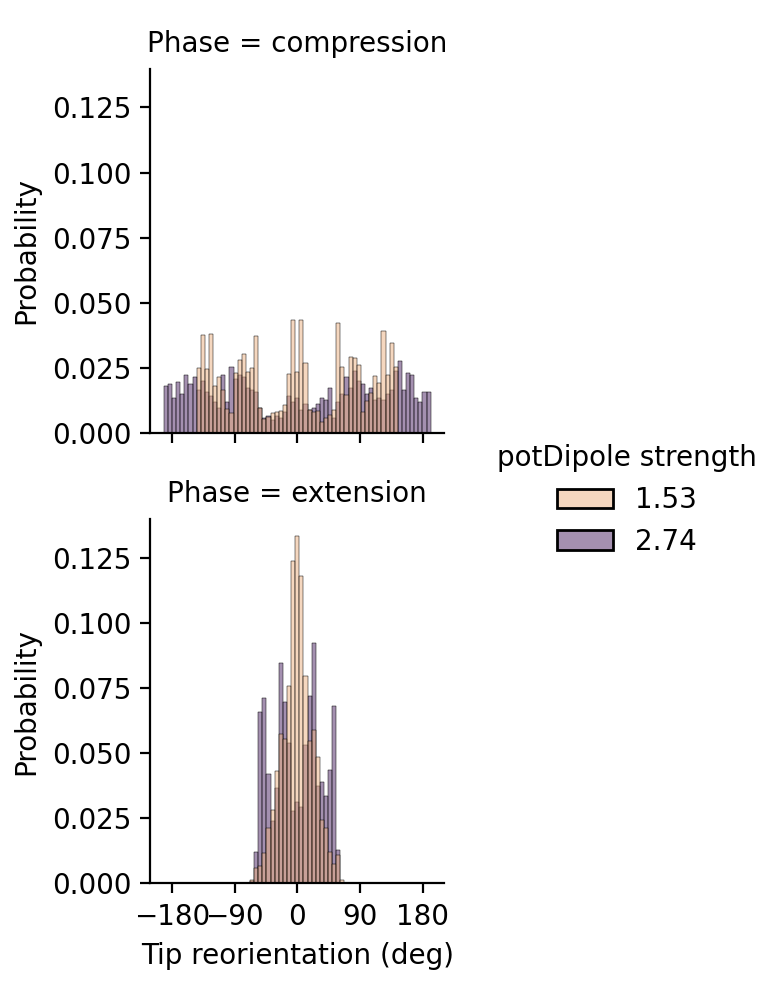

In [51]:

save = True

title = 'Tip angle reorientation distribution'

sns.displot(data = df_reorient, x = 'Tip reorientation (deg)', row = 'Phase', hue = parameter, 
            common_norm = False, stat = 'probability', palette = 'flare', height = 2.5)

ax = plt.gca()

ax.set_xticks([-180, -90, 0, 90, 180])

# plt.tight_layout()

if(save):
    
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
    

<IPython.core.display.Javascript object>


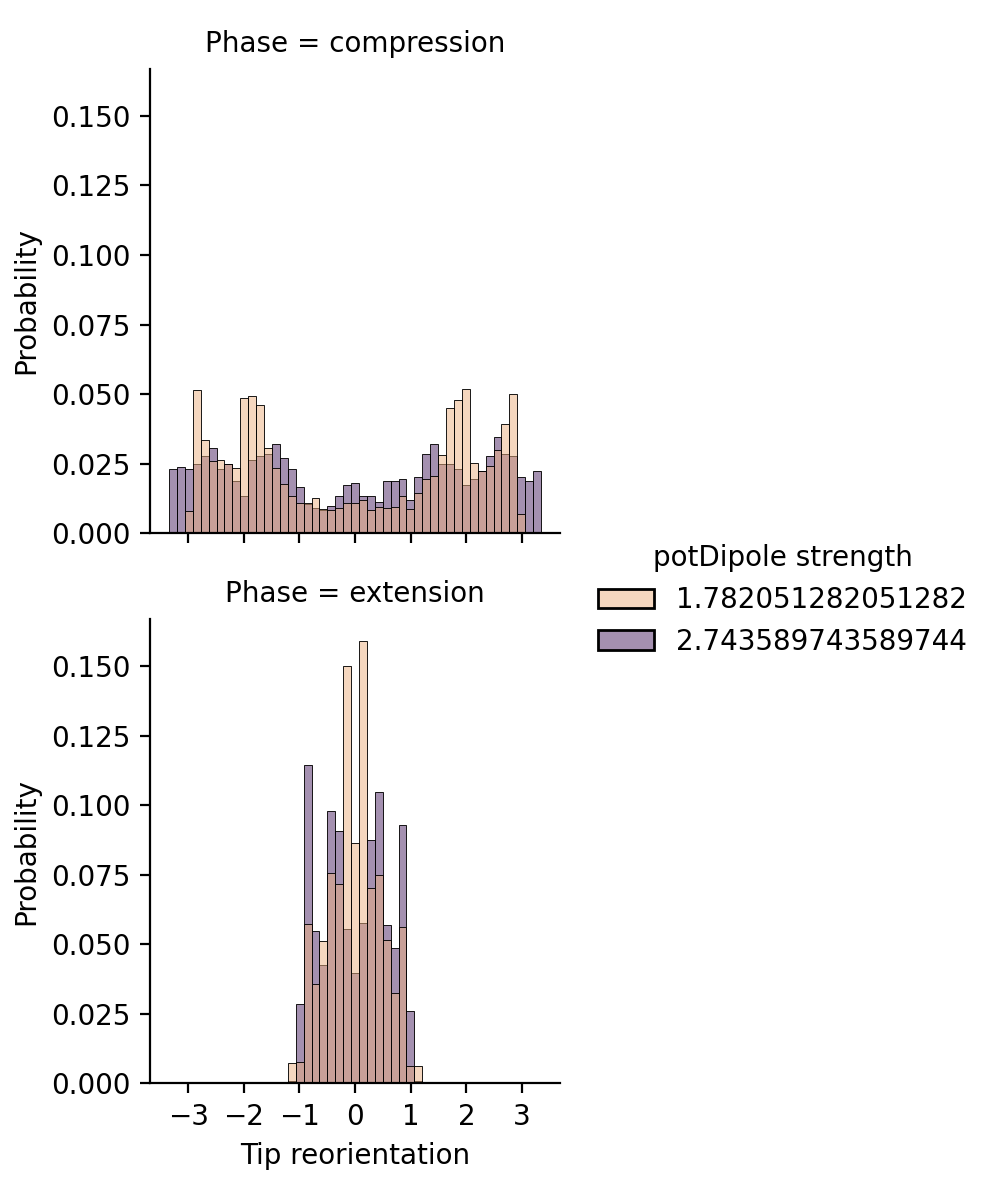

In [20]:
sns.displot(data = df_reorient, x = 'Tip reorientation', row = 'Phase', hue = parameter, common_norm = False, stat = 'probability', palette = 'flare', height = 3)

ax = plt.gca()

ax.set_xticks([-3,-2,-1,0,1,2,3])
